In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn
import seaborn as sns
from tqdm.notebook import tqdm

In [202]:
#In this case CPU will be used because linear non parallel computations are faster on CPU than GPU
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print(device)

cpu


In [203]:
df=pd.read_csv(filepath_or_buffer='Data\\Linear Regression.csv', )
print(df.head())
df.drop(df.index[260:300], inplace=True)
num_missing_values=df.isnull().values.sum()
print(f'found {num_missing_values} missing values, missing value will be dropped')

   X         Y
0  1  3.888889
1  2  4.555556
2  3  5.222222
3  4  5.888889
4  5  6.555556
found 0 missing values, missing value will be dropped


In [204]:
df.describe()

,X,Y
count,260.000000,260.000000
mean,130.500000,90.222222
std,75.199734,50.133156
min,1.000000,3.888889
25%,65.750000,47.055556
50%,130.500000,90.222222
75%,195.250000,133.388889
max,260.000000,176.555556


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       260 non-null    int64  
 1   Y       260 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [206]:
X_np = np.array(df['X'], dtype=np.float32)
Y_np = np.array(df['Y'], dtype=np.float32)
noise_X = np.random.normal(0, 6, X_np.shape)
noise_Y = np.random.normal(0, 5, Y_np.shape)
X_np=X_np+noise_X
Y_np=Y_np+noise_Y
df_x_t = Variable(torch.from_numpy(X_np.astype(np.float32)).reshape(-1,1)).to(device)
df_y_t = Variable(torch.from_numpy(Y_np.astype(np.float32)).reshape(-1,1)).to(device)
#print(df_x_t)
#print(df_y_t)

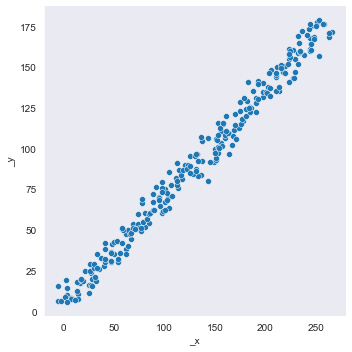

In [207]:
sns.relplot(x=X_np, y=Y_np)
plt.show()

In [208]:
# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everything in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_size,output_size)

    def forward(self,x):
        return self.linear(x)

run two cells bellow together to do not accumulate training model

In [209]:
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1
model.to(device)
# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.00001   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [210]:
# train model
loss_list = []
#loss=torch.tensor([])
iteration_number = 100
for iteration in tqdm(range(iteration_number)):
    # Forward to get output
    results = model(df_x_t)
    # Calculate Loss
    loss = mse(results, df_y_t)
    # optimization
    optimizer.zero_grad()
    # backward propagation
    loss.backward()
    # Updating parameters
    optimizer.step()
    # store loss
    loss_list.append(loss.data)
    # print loss
    if iteration % 1 == 0:
       print('epoch {}, loss {}'.format(iteration, loss.data))
print(f'---Model calculated---\nloss: {loss_list[iteration_number-1]}')

  0%|          | 0/100 [00:00<?, ?it/s]

epoch 0, loss 286.5442810058594
epoch 1, loss 116.32294464111328
epoch 2, loss 65.40245056152344
epoch 3, loss 50.169864654541016
epoch 4, loss 45.613101959228516
epoch 5, loss 44.249942779541016
epoch 6, loss 43.8421516418457
epoch 7, loss 43.72011184692383
epoch 8, loss 43.6835823059082
epoch 9, loss 43.6726188659668
epoch 10, loss 43.669307708740234
epoch 11, loss 43.66828536987305
epoch 12, loss 43.66794967651367
epoch 13, loss 43.66781234741211
epoch 14, loss 43.66773986816406
epoch 15, loss 43.66769027709961
epoch 16, loss 43.667640686035156
epoch 17, loss 43.667606353759766
epoch 18, loss 43.66754913330078
epoch 19, loss 43.66749572753906
epoch 20, loss 43.66746139526367
epoch 21, loss 43.66740798950195
epoch 22, loss 43.66736602783203
epoch 23, loss 43.667320251464844
epoch 24, loss 43.667274475097656
epoch 25, loss 43.66722869873047
epoch 26, loss 43.667171478271484
epoch 27, loss 43.66714096069336
epoch 28, loss 43.667091369628906
epoch 29, loss 43.66704177856445
epoch 30, lo

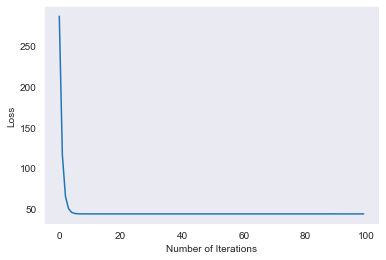

In [211]:
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [212]:
#Printing model parameters
parameters ={}
for ite, parameter in enumerate(model.parameters()):
    if parameter.requires_grad:
        parameters[f"{ite}"] = parameter.data.item()
        print(f'{parameter.name} {ite} {parameter.data.item()}')

None 0 0.6795834898948669
None 1 0.736693799495697


In [213]:
print(parameters)
x =np.arange(0,260, 20)
y = x * parameters['0'] + parameters['1']
df1 = pd.DataFrame({'x':x,'y':y})


{'0': 0.6795834898948669, '1': 0.736693799495697}


<AxesSubplot:xlabel='x', ylabel='y'>

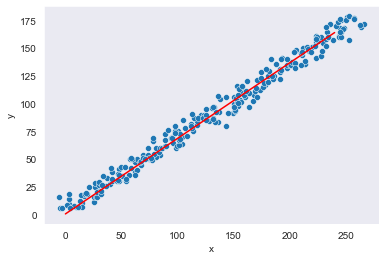

In [214]:
fig, ax = plt.subplots()
sns.set_style("dark")
sns.scatterplot(x=X_np, y=Y_np,ax=ax)
sns.lineplot(x="x", y="y", data=df1, ax = ax, color='red')